<a href="https://colab.research.google.com/github/edgi-govdata-archiving/EEW_TRI/blob/main/TRI_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install ECHO_modules

In [ ]:
!pip install ECHO_modules &>/dev/null;
from ECHO_modules.get_data import get_echo_data

### Load TRI chemicals reference

In [ ]:
import pandas
tri_chemicals = pandas.read_excel("https://www.epa.gov/system/files/documents/2023-09/TRI%20Chemical%20List%20Groupings%20for%20Analysis%20Sept.%202023%20.xlsx")
tri_chemicals

,Chemical,Chemical ID / CAS #,Chemical ID (10-digits),Source Registry System Id,First RY,Last RY,2020 Core Chemicals,2012 Core Chemicals,2011 Core Chemicals,2001 Core Chemicals,...,NEUROLOGICAL,OCULAR,OTHER_SYSTEMIC,RENAL,REPRODUCTIVE,RESPIRATORY,NO_HEALTH_EFFECTS,ACUTE,INTERMEDIATE,CHRONIC
0,"1-(3-Chloroallyl)-3,5,7-triaza-1-azoniaadamant...",4080-31-3,0004080313,121244.0,1995,NaN,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
1,"1,1,1,2-Tetrachloro-2-fluoroethane (HCFC-121a)",354-11-0,0000354110,43448.0,1995,NaN,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1,1,1,2-Tetrachloroethane",630-20-6,0000630206,65102.0,1994,NaN,X,X,X,X,...,X,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,X
3,"1,1,1-Trichloroethane",71-55-6,0000071556,4796.0,1987,NaN,X,X,X,X,...,X,NaN,NaN,NaN,NaN,NaN,NaN,X,X,X
4,"1,1,2,2-Tetrachloro-1-fluoroethane (HCFC-121)",354-14-3,0000354143,43455.0,1995,NaN,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,Warfarin and salts,N874,N874,649681.0,1994,NaN,X,X,X,X,...,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,X
825,Xylene (mixed isomers),1330-20-7,0001330207,84970.0,1987,NaN,X,X,X,X,...,X,X,X,NaN,NaN,X,NaN,X,X,X
826,Zinc (fume or dust),7440-66-6,0007440666,150235.0,1987,NaN,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,X
827,Zinc compounds,N982,N982,649699.0,1987,NaN,X,X,X,X,...,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,X


### Two types of queries - 1: filter the TRI list and look these chemicals up in X program; 2: Look up releases in a specific program and then check those chemicals in the TRI list.

#### Query 1: filter the TRI list and look these chemicals up in X program

In [ ]:
# Find CWA priority pollutants that are known to have chronic effects and effects on neurological system
tri_chemicals_filtered = tri_chemicals.loc[(tri_chemicals['CHRONIC']=="X") & (tri_chemicals['NEUROLOGICAL']=="X")]
tri_chemicals_filtered

,Chemical,Chemical ID / CAS #,Chemical ID (10-digits),Source Registry System Id,First RY,Last RY,2020 Core Chemicals,2012 Core Chemicals,2011 Core Chemicals,2001 Core Chemicals,...,NEUROLOGICAL,OCULAR,OTHER_SYSTEMIC,RENAL,REPRODUCTIVE,RESPIRATORY,NO_HEALTH_EFFECTS,ACUTE,INTERMEDIATE,CHRONIC
2,"1,1,1,2-Tetrachloroethane",630-20-6,0000630206,65102.0,1994,NaN,X,X,X,X,...,X,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,X
3,"1,1,1-Trichloroethane",71-55-6,0000071556,4796.0,1987,NaN,X,X,X,X,...,X,NaN,NaN,NaN,NaN,NaN,NaN,X,X,X
10,"1,1,2-Trichloroethane",79-00-5,0000079005,7518.0,1987,NaN,X,X,X,X,...,X,NaN,NaN,NaN,NaN,NaN,NaN,X,X,X
29,"1,2-Dichloropropane",78-87-5,0000078875,7393.0,1987,NaN,X,X,X,X,...,X,NaN,NaN,NaN,NaN,X,NaN,X,X,X
46,"1,4-Dichlorobenzene",106-46-7,0000106467,23622.0,1987,NaN,X,X,X,X,...,X,NaN,NaN,X,NaN,X,NaN,X,X,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,Trichlorfon,52-68-6,0000052686,1586.0,1987,NaN,X,X,X,X,...,X,NaN,X,NaN,NaN,NaN,NaN,X,NaN,X
805,Trichloroethylene,79-01-6,0000079016,7526.0,1987,NaN,X,X,X,X,...,X,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
808,Triethylamine,121-44-8,0000121448,31708.0,1995,NaN,X,X,X,X,...,X,X,NaN,NaN,NaN,NaN,NaN,X,NaN,X
821,Vinyl chloride,75-01-4,0000075014,5231.0,1987,NaN,X,X,X,X,...,X,X,NaN,NaN,NaN,X,NaN,X,X,X


In [ ]:
# Look for these in the CWA DMRs (or TRI? or CAA)
chems = list(tri_chemicals_filtered['Chemical'].unique())
## Split list of chemicals - https://stackoverflow.com/questions/312443/how-do-i-split-a-list-into-equally-sized-chunks
chems = [chems[i:i + 25] for i in range(0, len(chems), 25)]
## Go get data
results = pandas.DataFrame()
for chunk in chems:
  sql = 'select * from "DMR_FY2022_MVIEW" where lower("PARAMETER_DESC") like any (array[{}])'.format(
    ','.join('\'%'+s.lower()+'%\'' for s in chunk))
  print(sql) # Debugging
  data = get_echo_data(sql)
  results = pandas.concat([results,data])
# Might have some duplicates because of the split SQL queries and concat. Drop here
results.drop_duplicates(inplace=True)
results

select * from "DMR_FY2022_MVIEW" where lower("PARAMETER_DESC") like any (array['%1,1,1,2-tetrachloroethane%','%1,1,1-trichloroethane%','%1,1,2-trichloroethane%','%1,2-dichloropropane%','%1,4-dichlorobenzene%','%1-bromopropane%','%2,3,5-trimethylphenyl methylcarbamate%','%2,4-dimethylphenol%','%2,4-dinitrotoluene%','%2,4-dithiobiuret%','%2-methylpyridine%','%acephate%','%acetophenone%','%acrylamide%','%acrylonitrile%','%aldicarb%','%allyl chloride%','%aluminum (fume or dust)%','%arsenic%','%arsenic compounds%','%bendiocarb%','%benzidine%','%bifenthrin%','%bromine%','%bromomethane%'])


/usr/local/lib/python3.10/dist-packages/ECHO_modules/get_data.py:33: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv(data_location,encoding='iso-8859-1')


select * from "DMR_FY2022_MVIEW" where lower("PARAMETER_DESC") like any (array['%carbaryl%','%carbofuran%','%carbon disulfide%','%chlorine dioxide%','%chloromethane%','%chlorpyrifos-methyl%','%cresol (mixed isomers)%','%cycloate%','%cyhalothrin%','%decabromodiphenyl oxide%','%diazinon%','%dicamba%','%dichloromethane%','%dichlorvos%','%dicyclopentadiene%','%dimethoate%','%dimethylamine%','%ethoprop%','%ethylbenzene%','%ethylene oxide%','%famphur%','%fenpropathrin%','%fenthion%','%fenvalerate%','%ferbam%'])


/usr/local/lib/python3.10/dist-packages/ECHO_modules/get_data.py:33: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv(data_location,encoding='iso-8859-1')


select * from "DMR_FY2022_MVIEW" where lower("PARAMETER_DESC") like any (array['%fluorouracil%','%freon 113 (cfc-113)%','%heptachlor%','%hexachloroethane%','%hexachlorophene%','%hydramethylnon%','%hydrogen cyanide%','%hydrogen sulfide%','%isofenphos%','%malathion%','%manganese%','%m-cresol%','%mercury%','%mercury compounds%','%merphos%','%methacrylonitrile%','%methanol%','%methiocarb%','%methoxone sodium salt%','%methyl parathion%','%methyl tert-butyl ether%','%mevinphos%','%molinate%','%naled%','%naphthalene%'])


/usr/local/lib/python3.10/dist-packages/ECHO_modules/get_data.py:33: DtypeWarning: Columns (21,23,32) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv(data_location,encoding='iso-8859-1')


select * from "DMR_FY2022_MVIEW" where lower("PARAMETER_DESC") like any (array['%n-butyl alcohol%','%n-hexane%','%o-cresol%','%oxydemeton-methyl%','%paraldehyde%','%pebulate%','%pentachloroethane%','%pentobarbital sodium%','%permethrin%','%phenol%','%pirimiphos-methyl%','%profenofos%','%propetamphos%','%propoxur%','%s,s,s-tributyltrithiophosphate%','%sethoxydim%','%s-ethyl dipropylthiocarbamate%','%styrene%','%sulfuryl fluoride%','%temephos%','%tetrachloroethylene%','%tetrachlorvinphos%','%tetramethrin%','%thiodicarb%','%thiram%'])


/usr/local/lib/python3.10/dist-packages/ECHO_modules/get_data.py:33: DtypeWarning: Columns (3,12) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv(data_location,encoding='iso-8859-1')


select * from "DMR_FY2022_MVIEW" where lower("PARAMETER_DESC") like any (array['%toluene%','%triadimefon%','%triallate%','%trichlorfon%','%trichloroethylene%','%triethylamine%','%vinyl chloride%','%xylene (mixed isomers)%'])


/usr/local/lib/python3.10/dist-packages/ECHO_modules/get_data.py:33: DtypeWarning: Columns (3,12) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv(data_location,encoding='iso-8859-1')


,ACTIVITY_ID,DMR_EVENT_ID,DMR_SAMPLE_TYPE_CODE,DMR_UNIT_CODE,DMR_UNIT_DESC,DMR_VALUE_ID,DMR_VALUE_NMBR,DMR_VALUE_QUALIFIER_CODE,DMR_VALUE_STANDARD_UNITS,EXCEEDANCE_PCT,...,FAC_LAT,FAC_LONG,FAC_DERIVED_WBD,FAC_DERIVED_CD113,FAC_PERCENT_MINORITY,FAC_POP_DEN,FAC_DERIVED_HUC,FAC_SIC_CODES,FAC_NAICS_CODES,DFR_URL
0,3601735469,3612873232,NaN,NaN,NaN,3.755171e+09,NaN,NaN,NaN,NaN,...,33.467970,-112.345560,1.507010e+11,8.0,53.666,2832.35,15070102.0,4952,NaN,http://echo.epa.gov/detailed-facility-report?f...
1,3602221060,3612530275,NaN,NaN,NaN,3.765071e+09,NaN,NaN,NaN,NaN,...,34.171611,-119.053056,1.807010e+11,26.0,43.781,149.82,18070103.0,4952,NaN,http://echo.epa.gov/detailed-facility-report?f...
2,3601022104,3607380783,NaN,NaN,NaN,3.758258e+09,NaN,NaN,NaN,NaN,...,39.197114,-121.313590,1.802013e+11,3.0,16.867,41.63,18020125.0,4952,NaN,http://echo.epa.gov/detailed-facility-report?f...
3,3400137828,3612525531,NaN,NaN,NaN,3.751216e+09,NaN,NaN,NaN,NaN,...,34.044080,-117.360420,1.807020e+11,31.0,82.912,2610.30,18070203.0,4952,NaN,http://echo.epa.gov/detailed-facility-report?f...
4,3602221060,3612530275,NaN,NaN,NaN,3.765071e+09,NaN,NaN,NaN,NaN,...,34.171611,-119.053056,1.807010e+11,26.0,43.781,149.82,18070103.0,4952,NaN,http://echo.epa.gov/detailed-facility-report?f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91261,3602322610,3614082304,CP,26.0,lb/d,3.775093e+09,0.0,=,0.0,NaN,...,29.002075,-95.399777,1.204021e+11,14.0,54.999,910.59,12040205.0,2821,325199 325311 325110 325211 48621,http://echo.epa.gov/detailed-facility-report?f...
91262,3602322610,3617291553,NaN,NaN,NaN,3.775093e+09,NaN,NaN,NaN,NaN,...,29.002075,-95.399777,1.204021e+11,14.0,54.999,910.59,12040205.0,2821,325199 325311 325110 325211 48621,http://echo.epa.gov/detailed-facility-report?f...
91263,3602322610,3614082304,CP,26.0,lb/d,3.775093e+09,0.0,=,0.0,NaN,...,29.002075,-95.399777,1.204021e+11,14.0,54.999,910.59,12040205.0,2821,325199 325311 325110 325211 48621,http://echo.epa.gov/detailed-facility-report?f...
91264,3602322610,3617291668,NaN,NaN,NaN,3.776854e+09,NaN,NaN,NaN,NaN,...,29.002075,-95.399777,1.204021e+11,14.0,54.999,910.59,12040205.0,2821,325199 325311 325110 325211 48621,http://echo.epa.gov/detailed-facility-report?f...


What percent of all DMRs in FY 2022 do these reports represent?

In [ ]:
sql = 'select count(*) from "DMR_FY2022_MVIEW"'
get_echo_data(sql)

,count
0,25553038


In [ ]:
str(round((1516140/25553038)*100,2)) + "%"

'5.93%'

How many reports were made for each substance? Representing what quantity (e.g. mg/L)?

The following cell shows the top 20 for each.

In [ ]:
# Report on these DMRs:
# How many? How much?
count = results.groupby(by="PARAMETER_DESC")[["ACTIVITY_ID"]].count()
amount = results.groupby(by=["PARAMETER_DESC", "STANDARD_UNIT_DESC"])[["DMR_VALUE_NMBR"]].sum()

display(count.sort_values(by="ACTIVITY_ID", ascending=False).head(20))
display(amount.sort_values(by="DMR_VALUE_NMBR", ascending=False).head(20))

,ACTIVITY_ID
PARAMETER_DESC,
"Manganese, total [as Mn]",691572
"Manganese, total recoverable",166314
"Mercury, total [as Hg]",64284
"Arsenic, total recoverable",46448
Toluene,35042
Ethylbenzene,34415
"Mercury, total recoverable",34069
"Arsenic, total [as As]",32811
Naphthalene,29736


,,DMR_VALUE_NMBR
PARAMETER_DESC,STANDARD_UNIT_DESC,
"Mercury, total low level",mg/L,1.037376e+07
"Manganese, dissolved [as Mn]",mg/L,3.676194e+06
"Phenol, calculated limit",mg/L,2.241655e+06
"Manganese, total [as Mn]",mg/L,1.940180e+06
"Mercury, total recoverable",mg/L,1.282994e+06
"Manganese, total recoverable",mg/L,5.248691e+05
Toluene,mg/L,5.112457e+05
"Manganese, potentially dissolvd",mg/L,4.653353e+05
"Manganese, total [as Mn]",kg/d,3.110707e+05


How many permit exceedances were reported for these substances? For each susbtance, what was the median percent exceeded?

The following shows the top 20 for each.

In [ ]:
## Number of exceedances, median percent exceedances?
exceed = results.loc[results["EXCEEDANCE_PCT"]>0].groupby(by="PARAMETER_DESC")[["EXCEEDANCE_PCT"]].count()
exceed_med = results.loc[results["EXCEEDANCE_PCT"]>0].groupby(by=["PARAMETER_DESC"])[["EXCEEDANCE_PCT"]].median()

display(exceed.sort_values(by="EXCEEDANCE_PCT", ascending=False).head(20))
display(exceed_med.sort_values(by="EXCEEDANCE_PCT", ascending=False).head(20))

,EXCEEDANCE_PCT
PARAMETER_DESC,
"Manganese, total [as Mn]",623
"Mercury, total low level",194
"Mercury, total [as Hg]",172
"Manganese, total recoverable",148
"Mercury, total recoverable",108
"Arsenic, total recoverable",97
"Arsenic, total [as As]",87
Dichlorobromomethane,61
"Manganese, dissolved [as Mn]",52


,EXCEEDANCE_PCT
PARAMETER_DESC,
Carbon disulfide,99999.0
Acrylamide,58233.0
Vinyl chloride,18813.0
Benzidine,15052.0
Trimethylbenzene,8321.0
N-Nitrosodimethylamine [NDMA],7384.0
Heptachlor,4233.0
"1,2,4-Trimethylbenzene",1260.0
"4,6-Dinitro-o-cresol",1146.0


How many facilities reported these substances? What does EPA report as the % minority in the areas surrounding facilities reporting these substances?

In [ ]:
# Report on these facilities:
# How many, where, what kind, etc.?
fac = len(results["FAC_NAME"].unique())
min = results["FAC_PERCENT_MINORITY"].mean()

display(fac, min)

17794

16.06644688942522

#### Query 2: Look up releases in a specific program and then check those chemicals in the TRI list.

In [ ]:
sql = 'select * from "TOXIC_RELEASES_VIEW" where "FAC_CITY" = \'BELLINGHAM\' and "FAC_STATE" = \'WA\' and "REPORTING_YEAR" = 2022'
bell = get_echo_data(sql)
bell

,REPORTING_YEAR,REGISTRY_ID,PGM_SYS_ACRNM,PGM_SYS_ID,POLLUTANT_NAME,ANNUAL_EMISSION,UNIT_OF_MEASURE,NEI_TYPE,NEI_HAP_VOC_FLAG,FAC_NAME,...,FAC_LAT,FAC_LONG,FAC_DERIVED_WBD,FAC_DERIVED_CD113,FAC_PERCENT_MINORITY,FAC_POP_DEN,FAC_DERIVED_HUC,FAC_SIC_CODES,FAC_NAICS_CODES,DFR_URL
0,2022,110070813302,TRIS,9822WLDCST43BAK,Lead compounds,0.200000,Pounds,NaN,NaN,"OLDCASTLE PRECAST, INC. - BELLINGHAM",...,48.787336,-122.446392,171100040601,2,20.192,1939.01,17110002,NaN,327390,http://echo.epa.gov/detailed-facility-report?f...
1,2022,110070813302,TRIS,9822WLDCST43BAK,Mercury compounds,0.000000,Pounds,NaN,NaN,"OLDCASTLE PRECAST, INC. - BELLINGHAM",...,48.787336,-122.446392,171100040601,2,20.192,1939.01,17110002,NaN,327390,http://echo.epa.gov/detailed-facility-report?f...
2,2022,110000490031,TRIS,98225THSRC730MA,Pentachlorophenol,0.000000,Pounds,NaN,NaN,THE OESER COMPANY,...,48.770278,-122.514444,171100040601,1,20.143,2585.72,17110002,2491.0,321114,http://echo.epa.gov/detailed-facility-report?f...
3,2022,110039204973,TRIS,9822WGBNTR3765A,Lead,0.000000,Pounds,NaN,NaN,ALPHA TECHNOLOGIES SERVICES,...,48.785837,-122.524043,171100040601,1,21.271,1449.51,17110004,NaN,335999 336322,http://echo.epa.gov/detailed-facility-report?f...
4,2022,110000490031,TRIS,98225THSRC730MA,Dioxin and dioxin-like compounds -- TRI,0.000009,Pounds,NaN,NaN,THE OESER COMPANY,...,48.770278,-122.514444,171100040601,1,20.143,2585.72,17110002,2491.0,321114,http://echo.epa.gov/detailed-facility-report?f...
5,2022,110000490059,TRIS,98226HYDRS2150D,Styrene,26940.000000,Pounds,NaN,NaN,MAAX HYDRO SWIRL MANUFACTURING,...,48.781591,-122.447329,171100040601,2,19.436,2189.92,17110002,3088.0,326191,http://echo.epa.gov/detailed-facility-report?f...


In [ ]:
# Try to find a match between these pollutants and those in the TRI reference
pollutants = list(bell["POLLUTANT_NAME"].unique())

bell_pollutants = tri_chemicals.loc[tri_chemicals["Chemical"].isin(pollutants)]

bell_pollutants

,Chemical,Chemical ID / CAS #,Chemical ID (10-digits),Source Registry System Id,First RY,Last RY,2020 Core Chemicals,2012 Core Chemicals,2011 Core Chemicals,2001 Core Chemicals,...,NEUROLOGICAL,OCULAR,OTHER_SYSTEMIC,RENAL,REPRODUCTIVE,RESPIRATORY,NO_HEALTH_EFFECTS,ACUTE,INTERMEDIATE,CHRONIC
498,Lead,7439-92-1,0007439921,149583.0,1987,NaN,X,X,X,X,...,X,NaN,NaN,X,X,NaN,NaN,NaN,NaN,NaN
499,Lead compounds,N420,N420,650002.0,1987,NaN,X,X,X,X,...,X,NaN,NaN,X,X,NaN,NaN,NaN,NaN,NaN
515,Mercury compounds,N458,N458,650028.0,1987,NaN,X,X,X,X,...,X,NaN,X,X,NaN,NaN,NaN,X,NaN,X
621,Pentachlorophenol,87-86-5,0000087865,11437.0,1987,NaN,X,X,X,X,...,NaN,NaN,NaN,NaN,X,NaN,NaN,X,X,X
749,Styrene,100-42-5,0000100425,19414.0,1987,NaN,X,X,X,X,...,X,X,NaN,NaN,NaN,X,NaN,X,NaN,X


Report some summary information on the chemicals reported released here:


*   How many facilities reported?
*   How many different substances?
*   How many substances were we able to actually look up in the TRI reference?
*   What do we know about those substances?



In [ ]:
print("Number of facilities in this area reporting toxics (to TRI in 2022): " + str(len(bell["REGISTRY_ID"].unique())))
print("Number of substances they reported (to TRI in 2022): " + str(len(bell["POLLUTANT_NAME"].unique())))
print("How many substances were we able to actually look up in the TRI reference?: " + str(len(bell_pollutants["Chemical"].unique())))
import ipywidgets as widgets
tri_interact = widgets.Dropdown(
    options=bell_pollutants.columns, # Need to filter more...
    value="CHRONIC",
    description='Known health impact:',
    disabled=False,
)
tri_interact

Number of facilities in this area reporting toxics (to TRI in 2022): 4
Number of substances they reported (to TRI in 2022): 6
How many substances were we able to actually look up in the TRI reference?: 5


Dropdown(description='Known health impact:', index=49, options=('Chemical', 'Chemical ID / CAS #', 'Chemical I…

In [ ]:
print("How many of those substances have " + tri_interact.value + " impact on human health? " +
      str(len(bell_pollutants.loc[bell_pollutants[tri_interact.value]=="X"])))

print("How much of those substances having a " + tri_interact.value + " impact on human health were reported released (to TRI in 2022)? " +
      str(bell.loc[bell["POLLUTANT_NAME"].isin(list(bell_pollutants.loc[bell_pollutants[tri_interact.value]=="X"]["Chemical"].unique()))]["ANNUAL_EMISSION"].sum()) +
      " pounds")
print("How many substances have an unknown " + tri_interact.value + " impact on human health? " +
      str(len(bell_pollutants.loc[bell_pollutants[tri_interact.value].isna()])))

How many of those substances have CARDIOVASCULAR impact on human health? 2
How much of those substances having a CARDIOVASCULAR impact on human health were reported released (to TRI in 2022)? 0.2 pounds
How many substances have an unknown CARDIOVASCULAR impact on human health? 3


##### Query 2a: Try to match releases in a program other than TRI

In [ ]:
# Get DMRs for an area
sql = 'select * from "DMR_FY2022_MVIEW" where "FAC_CITY" = \'BELLINGHAM\' and "FAC_STATE" = \'WA\''
bell_dmr = get_echo_data(sql)
bell_dmr

,ACTIVITY_ID,DMR_EVENT_ID,DMR_SAMPLE_TYPE_CODE,DMR_UNIT_CODE,DMR_UNIT_DESC,DMR_VALUE_ID,DMR_VALUE_NMBR,DMR_VALUE_QUALIFIER_CODE,DMR_VALUE_STANDARD_UNITS,EXCEEDANCE_PCT,...,FAC_LAT,FAC_LONG,FAC_DERIVED_WBD,FAC_DERIVED_CD113,FAC_PERCENT_MINORITY,FAC_POP_DEN,FAC_DERIVED_HUC,FAC_SIC_CODES,FAC_NAICS_CODES,DFR_URL
0,3602937807,3621787204,NaN,NaN,NaN,3.756498e+09,NaN,NaN,NaN,NaN,...,48.736458,-122.444870,171100040603,2.0,16.348,2558.01,17110002,1794,NaN,http://echo.epa.gov/detailed-facility-report?f...
1,3602937807,3621787204,NaN,NaN,NaN,3.756498e+09,NaN,NaN,NaN,NaN,...,48.736458,-122.444870,171100040603,2.0,16.348,2558.01,17110002,1794,NaN,http://echo.epa.gov/detailed-facility-report?f...
2,3602937807,3621787210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.736458,-122.444870,171100040603,2.0,16.348,2558.01,17110002,1794,NaN,http://echo.epa.gov/detailed-facility-report?f...
3,3602937807,3621787210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.736458,-122.444870,171100040603,2.0,16.348,2558.01,17110002,1794,NaN,http://echo.epa.gov/detailed-facility-report?f...
4,3602937807,3621787215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.736458,-122.444870,171100040603,2.0,16.348,2558.01,17110002,1794,NaN,http://echo.epa.gov/detailed-facility-report?f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9098,3602936017,3621592336,NaN,NaN,NaN,3.759186e+09,0.0,=,0.0,NaN,...,48.761391,-122.505562,171100040601,2.0,20.335,3440.01,17110002,3732,336612 921190,http://echo.epa.gov/detailed-facility-report?f...
9099,3602936017,3621592341,NaN,NaN,NaN,3.767082e+09,3.0,=,3.0,NaN,...,48.761391,-122.505562,171100040601,2.0,20.335,3440.01,17110002,3732,336612 921190,http://echo.epa.gov/detailed-facility-report?f...
9100,3602936017,3621592344,NaN,NaN,NaN,3.767082e+09,0.0,=,0.0,NaN,...,48.761391,-122.505562,171100040601,2.0,20.335,3440.01,17110002,3732,336612 921190,http://echo.epa.gov/detailed-facility-report?f...
9101,3602936017,3621592346,NaN,NaN,NaN,3.768253e+09,0.0,=,0.0,NaN,...,48.761391,-122.505562,171100040601,2.0,20.335,3440.01,17110002,3732,336612 921190,http://echo.epa.gov/detailed-facility-report?f...


In [ ]:
# Get chemicals reported here
chems = list(bell_dmr['PARAMETER_DESC'].unique())
# Look up chems in TRI reference # contains
bell_dmr_tri_chemicals = pandas.DataFrame()
for c in chems:
  filtered = tri_chemicals.loc[tri_chemicals["Chemical"].str.match(c)] # !!!! This expects a perfect name/case match, which may not work well
  bell_dmr_tri_chemicals = pandas.concat([bell_dmr_tri_chemicals, filtered])
bell_dmr_tri_chemicals.drop_duplicates(inplace=True) # Drop duplicates that may have arisen due to concat
bell_dmr_tri_chemicals

,Chemical,Chemical ID / CAS #,Chemical ID (10-digits),Source Registry System Id,First RY,Last RY,2020 Core Chemicals,2012 Core Chemicals,2011 Core Chemicals,2001 Core Chemicals,...,NEUROLOGICAL,OCULAR,OTHER_SYSTEMIC,RENAL,REPRODUCTIVE,RESPIRATORY,NO_HEALTH_EFFECTS,ACUTE,INTERMEDIATE,CHRONIC
621,Pentachlorophenol,87-86-5,0000087865,11437.0,1987,NaN,X,X,X,X,...,NaN,NaN,NaN,NaN,X,NaN,NaN,X,X,X
615,p-Cresol,106-44-5,0000106445,23606.0,1987,NaN,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
555,Naphthalene,91-20-3,0000091203,13326.0,1987,NaN,X,X,X,X,...,X,NaN,NaN,NaN,NaN,X,NaN,X,X,X
232,Anthracene,120-12-7,0000120127,31013.0,1987,NaN,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN
640,Phenanthrene,85-01-8,0000085018,10199.0,1995,NaN,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
457,Formaldehyde,50-00-0,0000050000,1008.0,1987,NaN,X,X,X,X,...,NaN,X,NaN,NaN,NaN,X,NaN,X,X,X
401,Dimethyl phthalate,131-11-3,0000131113,35295.0,1987,NaN,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Rank companies on certain suites of chemicals
For instance, if there are X chemicals known to affect neurological systems, which companies report releasing X (or the largest share of X)?

In [ ]:
# Find chemicals known to affect neurological systems
tri_chemicals_filtered = tri_chemicals.loc[tri_chemicals['NEUROLOGICAL']=="X"]
tri_chemicals_filtered

,Chemical,Chemical ID / CAS #,Chemical ID (10-digits),Source Registry System Id,First RY,Last RY,2020 Core Chemicals,2012 Core Chemicals,2011 Core Chemicals,2001 Core Chemicals,...,NEUROLOGICAL,OCULAR,OTHER_SYSTEMIC,RENAL,REPRODUCTIVE,RESPIRATORY,NO_HEALTH_EFFECTS,ACUTE,INTERMEDIATE,CHRONIC
2,"1,1,1,2-Tetrachloroethane",630-20-6,0000630206,65102.0,1994,NaN,X,X,X,X,...,X,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,X
3,"1,1,1-Trichloroethane",71-55-6,0000071556,4796.0,1987,NaN,X,X,X,X,...,X,NaN,NaN,NaN,NaN,NaN,NaN,X,X,X
10,"1,1,2-Trichloroethane",79-00-5,0000079005,7518.0,1987,NaN,X,X,X,X,...,X,NaN,NaN,NaN,NaN,NaN,NaN,X,X,X
29,"1,2-Dichloropropane",78-87-5,0000078875,7393.0,1987,NaN,X,X,X,X,...,X,NaN,NaN,NaN,NaN,X,NaN,X,X,X
46,"1,4-Dichlorobenzene",106-46-7,0000106467,23622.0,1987,NaN,X,X,X,X,...,X,NaN,NaN,X,NaN,X,NaN,X,X,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,Trichlorfon,52-68-6,0000052686,1586.0,1987,NaN,X,X,X,X,...,X,NaN,X,NaN,NaN,NaN,NaN,X,NaN,X
805,Trichloroethylene,79-01-6,0000079016,7526.0,1987,NaN,X,X,X,X,...,X,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
808,Triethylamine,121-44-8,0000121448,31708.0,1995,NaN,X,X,X,X,...,X,X,NaN,NaN,NaN,NaN,NaN,X,NaN,X
821,Vinyl chloride,75-01-4,0000075014,5231.0,1987,NaN,X,X,X,X,...,X,X,NaN,NaN,NaN,X,NaN,X,X,X


In [ ]:
# Look for these in TRI 2022
# Turn the following into a standard function (we use it above too)
chems = list(tri_chemicals_filtered['Chemical'].unique())
## Split list of chemicals - https://stackoverflow.com/questions/312443/how-do-i-split-a-list-into-equally-sized-chunks
chems = [chems[i:i + 25] for i in range(0, len(chems), 25)]
## Go get data
results = pandas.DataFrame()
for chunk in chems:
  sql = 'select * from "TOXIC_RELEASES_VIEW" where lower("POLLUTANT_NAME") like any (array[{}]) and "REPORTING_YEAR" = 2022'.format(
    ','.join('\'%'+s.lower()+'%\'' for s in chunk))
  print(sql) # Debugging
  data = get_echo_data(sql)
  results = pandas.concat([results,data])
# Might have some duplicates because of the split SQL queries and concat. Drop here
results.drop_duplicates(inplace=True)
results

select * from "TOXIC_RELEASES_VIEW" where lower("POLLUTANT_NAME") like any (array['%1,1,1,2-tetrachloroethane%','%1,1,1-trichloroethane%','%1,1,2-trichloroethane%','%1,2-dichloropropane%','%1,4-dichlorobenzene%','%1-bromopropane%','%2,3,5-trimethylphenyl methylcarbamate%','%2,4-dimethylphenol%','%2,4-dinitrotoluene%','%2,4-dithiobiuret%','%2-methylpyridine%','%4,6-dinitro-o-cresol%','%acephate%','%acetophenone%','%acrylamide%','%acrylonitrile%','%aldicarb%','%allyl chloride%','%aluminum (fume or dust)%','%arsenic%','%arsenic compounds%','%bendiocarb%','%benzidine%','%bifenthrin%','%bromine%']) and "REPORTING_YEAR" = 2022
select * from "TOXIC_RELEASES_VIEW" where lower("POLLUTANT_NAME") like any (array['%bromomethane%','%carbaryl%','%carbofuran%','%carbon disulfide%','%chlorine dioxide%','%chloromethane%','%chlorpyrifos-methyl%','%cresol (mixed isomers)%','%cycloate%','%cyhalothrin%','%decabromodiphenyl oxide%','%diazinon%','%dicamba%','%dichloromethane%','%dichlorvos%','%dicyclopentadi

,REPORTING_YEAR,REGISTRY_ID,PGM_SYS_ACRNM,PGM_SYS_ID,POLLUTANT_NAME,ANNUAL_EMISSION,UNIT_OF_MEASURE,NEI_TYPE,NEI_HAP_VOC_FLAG,FAC_NAME,...,FAC_LAT,FAC_LONG,FAC_DERIVED_WBD,FAC_DERIVED_CD113,FAC_PERCENT_MINORITY,FAC_POP_DEN,FAC_DERIVED_HUC,FAC_SIC_CODES,FAC_NAICS_CODES,DFR_URL
0,2022,110071046784,TRIS,0885WNTNLM151LD,1-Bromopropane,10820.00,Pounds,NaN,NaN,"NATIONAL MANUFACTURING CO., INC.",...,40.558866,-74.465022,2.030105e+10,6.0,56.669,3196.34,2030105.0,NaN,332119,http://echo.epa.gov/detailed-facility-report?f...
1,2022,110000607362,TRIS,89820BTTLMCOPPE,Arsenic compounds,50.00,Pounds,NaN,NaN,NEWMONT MINING CORP COPPER CANYON FACILITY,...,40.500660,-117.106150,1.604011e+11,2.0,0.000,0.01,16040107.0,1044,212221 212230 48811,http://echo.epa.gov/detailed-facility-report?f...
2,2022,110067041837,TRIS,25265MNTNRRTE33,Arsenic compounds,75.00,Pounds,NaN,NaN,AMERICAN ELECTRIC POWER MOUNTAINEER PLANT,...,38.977493,-81.937108,5.030202e+10,3.0,2.270,165.42,5030202.0,NaN,221112,http://echo.epa.gov/detailed-facility-report?f...
3,2022,110041625676,TRIS,3708WPLMNT1717J,Arsenic compounds,0.00,Pounds,NaN,NaN,PALM COMMODITIES INTERNATIONAL LLC,...,36.018120,-86.599340,5.130203e+10,5.0,47.745,1138.62,5130203.0,NaN,424690,http://echo.epa.gov/detailed-facility-report?f...
4,2022,110038365382,TRIS,44087LBMRL1664E,Bromine,0.00,Pounds,NaN,NaN,ALBEMARLE AMENDMENTS LLC,...,41.297751,-81.465132,4.110002e+10,14.0,21.194,993.49,4110002.0,NaN,325188 325998 325199,http://echo.epa.gov/detailed-facility-report?f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,2022,110009717869,TRIS,28603CNTRY42012,Toluene,10955.00,Pounds,NaN,NaN,CENTURY FURNITURE INDUSTRIES PLANT,...,35.737818,-81.360176,3.050101e+10,5.0,31.634,1166.15,3050101.0,2511 2512,337122 337121,http://echo.epa.gov/detailed-facility-report?f...
2744,2022,110070725846,TRIS,54701WRRNV5200S,Toluene,1191.87,Pounds,NaN,NaN,WRR ENVIRONMENTAL SERVICES CO INC,...,44.757860,-91.457070,7.050005e+10,3.0,8.447,763.16,7050005.0,4953 7389,562211 325998 562219 562998 562910 562112,http://echo.epa.gov/detailed-facility-report?f...
2745,2022,110070725846,TRIS,54701WRRNV5200S,Trichloroethylene,168.24,Pounds,NaN,NaN,WRR ENVIRONMENTAL SERVICES CO INC,...,44.757860,-91.457070,7.050005e+10,3.0,8.447,763.16,7050005.0,4953 7389,562211 325998 562219 562998 562910 562112,http://echo.epa.gov/detailed-facility-report?f...
2746,2022,110070870130,TRIS,4864WNTRTN34SSB,Toluene,3336.32,Pounds,NaN,NaN,"NUTRITION & BIOSCIENCES USA 1, LLC, MIDLAND",...,43.602656,-84.218875,4.080201e+10,4.0,8.094,1079.87,4080201.0,NaN,325211 325998 48211 325199,http://echo.epa.gov/detailed-facility-report?f...


In [ ]:
# Link these to TRI company info
## Load TRI company info
import requests, zipfile, io, json

url = 'https://www3.epa.gov/tri/current/US_2022.zip'
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("/content")

tri_hqs = pandas.read_csv("US_4_2022.txt", delimiter = "\t", encoding='latin1', on_bad_lines='skip') # Some problems loading one row - skipping for now
tri_hqs

<ipython-input-6-3ae1e3aab9b6>:9: DtypeWarning: Columns (70,71,72,80,81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  tri_hqs = pandas.read_csv("US_4_2022.txt", delimiter = "\t", encoding='latin1', on_bad_lines='skip') # Some problems loading one row - skipping for now


,1. REPORTING YEAR,2. TITLE OF CERTIFYING OFFICIAL,3. NAME OF CERTIFYING OFFICIAL,4. TRIFD,5. NAME,6. STREET,7. CITY,8. COUNTY,9. STATE,10. ZIP CODE,...,82. NPDES NR G,83. NPDES NR H,84. NPDES NR I,85. NPDES NR J,86. LAST YEAR THE FACILITY REPORTED,87. FIRST YEAR THE FACILITY REPORTED,88. NUMBER OF FORMS SUBMITTED,89. TOTAL NUMBER OF FORMS SUBMITTED,20231015,Unnamed: 90
0,2022,SAFETY COORDINATOR,JOHN BLOUGH,9227WCLPRT722VI,1000PALMS VISTA CHINO PLANT,72200 VISTA CHINO AVE,THOUSAND PALMS,RIVERSIDE,CA,92276,...,NaN,NaN,NaN,NaN,2022,2009,3,17,NaN,NaN
1,2022,HR/EHS ASSISTANT,TARA VILLANUEVA,4680WNLSNG345EN,105861 - NELSON GLOBAL PRODUCTS INC,3405 ENGLE RD,FORT WAYNE,ALLEN,IN,46809,...,NaN,NaN,NaN,NaN,2022,2022,1,1,NaN,NaN
2,2022,NaN,ANGELA MELE,7410WTHSTR13521,11TH STREET BATCH PLANT,13521 E 11TH ST,TULSA,TULSA,OK,74108,...,NaN,NaN,NaN,NaN,2022,2011,2,16,NaN,NaN
3,2022,REGIONAL REGULATORY MANAGER,ROBIN JOHNSTON,7516WSPCLT233HY,1I BRANCH - SPECIALTY SERVICES COMPLEX,233 HOYT ROAD,WAXAHACHIE,ELLIS,TX,75167,...,NaN,NaN,NaN,NaN,2022,2012,2,40,NaN,NaN
4,2022,PURCHASING AGENT,LOUIS SZKLANECKI,60101STYDC450SL,1ST AYD CORP,1325 GATEWAY DRIVE,ELGIN,KANE,IL,60124,...,NaN,NaN,NaN,NaN,2022,1992,1,33,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21746,2022,DIRECTOR - EHS,THOMAS FROST,7513WZRNND4894I,ZURN INDUSTRIES LLC DBA STAINLESSDRAINS.COM,4894 INTERSTATE 30 W,CADDO MILLS,HUNT,TX,75135,...,NaN,NaN,NaN,NaN,2022,2014,2,18,NaN,NaN
21747,2022,DIRECTOR - EHS,THOMAS FROST,93446ZRNND1747C,ZURN INDUSTRIES WILKINS DIV,1747 COMMERCE WAY,PASO ROBLES,SAN LUIS OBISPO,CA,93446,...,NaN,NaN,NaN,NaN,2022,1991,1,61,NaN,NaN
21748,2022,HSE MANAGER,JAIME RUIZ,77562HPRTN409EA,ZXP TECHNOLOGIES LLC,409 E WALLISVILLE RD,HIGHLANDS,HARRIS,TX,77562,...,NaN,NaN,NaN,NaN,2022,1987,1,126,NaN,NaN
21749,2022,OPS PROJECT MANAGER,AMELIA WETZLER,9480WZYGCR39LAK,ZYGO CORP EXTREME PRECISION OPTICS,3900 LAKESIDE DRIVE,RICHMOND,CONTRA COSTA,CA,94806,...,NaN,NaN,NaN,NaN,2022,2021,1,2,NaN,NaN


In [ ]:
# Join TRI releases with context information
joined = pandas.merge(results, tri_hqs, left_on = "REGISTRY_ID", right_on = "16. EPA REGISTRY ID", how = "left")
## Summarize in terms of company
joined = joined.groupby(by=["27. SUBMITTED STANDARDIZED PARENT COMPANY NAME"])[["POLLUTANT_NAME"]].nunique()
joined["POLLUTANT_NAME"] = (joined["POLLUTANT_NAME"] / tri_chemicals_filtered.shape[0]) * 100 # express as percent of all relevant chemicals
joined.sort_values(by="POLLUTANT_NAME", ascending=False).head(20)

,POLLUTANT_NAME
27. SUBMITTED STANDARDIZED PARENT COMPANY NAME,
CLEAN HARBORS INC,58.407080
HERITAGE-WTI LLC,53.982301
VEOLIA NORTH AMERICA,52.212389
WESTLAKE CORP,28.318584
BASF CORP,28.318584
RI TECHNOLOGIES INC,27.433628
REPUBLIC SERVICES INC,25.663717
BERKSHIRE HATHAWAY INC,22.123894
LEHIGH HANSON,20.353982


### Cumulative Impacts


*   Assess pollutant exposures over time - number of different chemicals over time in a place
*   Assess pollutant exposures over a range of health impacts - Which places have the most different kinds of chemicals reported to TRI?



In [ ]:
# Which places (ZIP Codes?) have the most different kinds of chemicals reported to TRI?
sql = 'select * from "TOXIC_RELEASES_VIEW" where "REPORTING_YEAR" = 2022'
tri = get_echo_data(sql)
tri

/usr/local/lib/python3.10/dist-packages/ECHO_modules/get_data.py:33: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv(data_location,encoding='iso-8859-1')


,REPORTING_YEAR,REGISTRY_ID,PGM_SYS_ACRNM,PGM_SYS_ID,POLLUTANT_NAME,ANNUAL_EMISSION,UNIT_OF_MEASURE,NEI_TYPE,NEI_HAP_VOC_FLAG,FAC_NAME,...,FAC_LAT,FAC_LONG,FAC_DERIVED_WBD,FAC_DERIVED_CD113,FAC_PERCENT_MINORITY,FAC_POP_DEN,FAC_DERIVED_HUC,FAC_SIC_CODES,FAC_NAICS_CODES,DFR_URL
0,2022,110038166365,TRIS,53566BDGRS820W1,Ammonia,0.00,Pounds,NaN,NaN,BADGER STATE ETHANOL INC,...,42.594900,-89.666910,7.090003e+10,2.0,6.704,422.67,7090003.0,2869,325193,http://echo.epa.gov/detailed-facility-report?f...
1,2022,110000586125,TRIS,26366HRRSNRTE20,Beryllium compounds,12.00,Pounds,NaN,NaN,"MONONGAHELA POWER COMPANY, HARRISON STATION",...,39.384574,-80.331520,5.020002e+10,1.0,3.059,225.37,5020002.0,4911,221112,http://echo.epa.gov/detailed-facility-report?f...
2,2022,110000332444,TRIS,17001TRTMP465RA,"Certain glycol ethers, a limited set -- TRI",1288.84,Pounds,NaN,NaN,AMES TRUE TEMPER INC,...,40.226500,-76.957400,2.050305e+10,4.0,15.106,2061.09,2050305.0,3423,332216 332212 332211 332215,http://echo.epa.gov/detailed-facility-report?f...
3,2022,110070225146,TRIS,7163WNGVTY157MI,Maleic anhydride,170.00,Pounds,NaN,NaN,"INGEVITY ARKANSAS, LLC",...,33.136070,-91.967050,8.040202e+10,4.0,38.206,314.64,8040202.0,NaN,325194 325199,http://echo.epa.gov/detailed-facility-report?f...
4,2022,110000450173,TRIS,71052NTRNTHWY50,Lead compounds,60.00,Pounds,NaN,NaN,INTERNATIONAL PAPER CO - MANSFIELD MILL,...,32.158890,-93.556670,1.114021e+11,4.0,50.000,4.61,11140206.0,2631 2611,322130 322121 322110 32213,http://echo.epa.gov/detailed-facility-report?f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78276,2022,110031019822,TRIS,75602WSTLK229CA,Maleic anhydride,6433.00,Pounds,NaN,NaN,WESTLAKE LONGVIEW,...,32.439278,-94.688436,1.201000e+11,1.0,70.343,301.26,12010002.0,2821,325211 325998 325221,http://echo.epa.gov/detailed-facility-report?f...
78277,2022,110000422098,TRIS,54467SLGNC1400P,Methyl isobutyl ketone,1426.00,Pounds,NaN,NaN,SILGAN CONTAINERS MFG CORP,...,44.453960,-89.515530,7.070003e+10,3.0,8.982,466.69,7070003.0,3411,332431 332439,http://echo.epa.gov/detailed-facility-report?f...
78278,2022,110003502120,TRIS,02745RVXNC167JO,Zinc compounds,79.50,Pounds,NaN,NaN,AEROVOX,...,41.727340,-70.964090,1.090002e+10,9.0,11.839,608.80,1090002.0,3675,334416 334414 54171 561499,http://echo.epa.gov/detailed-facility-report?f...
78279,2022,110009389544,TRIS,46360DMNDM600RO,Manganese,5.00,Pounds,NaN,NaN,DIAMOND MFG CO MIDWEST,...,41.718440,-86.840660,4.040001e+10,1.0,30.485,926.65,4040001.0,3469,332116 332119,http://echo.epa.gov/detailed-facility-report?f...


In [ ]:
cumulative = tri.groupby(by="FAC_ZIP")[["POLLUTANT_NAME"]].nunique()
cumulative.sort_values(by="POLLUTANT_NAME", ascending=False).head(10)

,POLLUTANT_NAME
FAC_ZIP,
43920,191
71730,191
77705,188
77571,182
84029,124
77541,117
77630,105
69145,101
77536,100


In [ ]:
# Weight the above by how many body/health impacts the chemical has
## Join tri with tri reference
j = pandas.merge(tri, tri_chemicals, left_on="POLLUTANT_NAME", right_on="Chemical", how="left")
## Count X's
systems = [
"BODY_WEIGHT",
"CARDIOVASCULAR",
"DERMAL",
"DEVELOPMENTAL",
"ENDOCRINE",
"GASTROINTESTINAL",
"HEMATOLOGICAL",
"HEPATIC",
"IMMUNOLOGICAL",
"METABOLIC",
"MUSCULOSKELETAL",
"NEUROLOGICAL",
"OCULAR",
"OTHER_SYSTEMIC",
"RENAL",
"REPRODUCTIVE",
"RESPIRATORY"
]
j["count"] = j[systems].apply(lambda s: (s == "X").sum(), axis=1)
j

,REPORTING_YEAR,REGISTRY_ID,PGM_SYS_ACRNM,PGM_SYS_ID,POLLUTANT_NAME,ANNUAL_EMISSION,UNIT_OF_MEASURE,NEI_TYPE,NEI_HAP_VOC_FLAG,FAC_NAME,...,OCULAR,OTHER_SYSTEMIC,RENAL,REPRODUCTIVE,RESPIRATORY,NO_HEALTH_EFFECTS,ACUTE,INTERMEDIATE,CHRONIC,count
0,2022,110038166365,TRIS,53566BDGRS820W1,Ammonia,0.00,Pounds,NaN,NaN,BADGER STATE ETHANOL INC,...,X,X,NaN,NaN,X,NaN,X,NaN,X,3
1,2022,110000586125,TRIS,26366HRRSNRTE20,Beryllium compounds,12.00,Pounds,NaN,NaN,"MONONGAHELA POWER COMPANY, HARRISON STATION",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2022,110000332444,TRIS,17001TRTMP465RA,"Certain glycol ethers, a limited set -- TRI",1288.84,Pounds,NaN,NaN,AMES TRUE TEMPER INC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2022,110070225146,TRIS,7163WNGVTY157MI,Maleic anhydride,170.00,Pounds,NaN,NaN,"INGEVITY ARKANSAS, LLC",...,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,X,1
4,2022,110000450173,TRIS,71052NTRNTHWY50,Lead compounds,60.00,Pounds,NaN,NaN,INTERNATIONAL PAPER CO - MANSFIELD MILL,...,NaN,NaN,X,X,NaN,NaN,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78276,2022,110031019822,TRIS,75602WSTLK229CA,Maleic anhydride,6433.00,Pounds,NaN,NaN,WESTLAKE LONGVIEW,...,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,X,1
78277,2022,110000422098,TRIS,54467SLGNC1400P,Methyl isobutyl ketone,1426.00,Pounds,NaN,NaN,SILGAN CONTAINERS MFG CORP,...,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,X,3
78278,2022,110003502120,TRIS,02745RVXNC167JO,Zinc compounds,79.50,Pounds,NaN,NaN,AEROVOX,...,NaN,NaN,NaN,X,NaN,NaN,NaN,NaN,X,2
78279,2022,110009389544,TRIS,46360DMNDM600RO,Manganese,5.00,Pounds,NaN,NaN,DIAMOND MFG CO MIDWEST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,1


In [ ]:
cumulative = j.groupby(by="FAC_ZIP").agg({"POLLUTANT_NAME": 'nunique', "count": "median"})
cumulative["weighted"] = cumulative["POLLUTANT_NAME"] * cumulative["count"]
cumulative.sort_values(by="weighted", ascending=False).head(10)

,POLLUTANT_NAME,count,weighted
FAC_ZIP,,,
71730,191,2.0,382.0
77705,188,2.0,376.0
77541,117,2.0,234.0
77630,105,2.0,210.0
69145,101,2.0,202.0
44044,100,2.0,200.0
77536,100,2.0,200.0
43920,191,1.0,191.0
77507,95,2.0,190.0


In [ ]:
# number of different chemicals over time in a place
sql = 'select * from "TOXIC_RELEASES_VIEW" where "FAC_ZIP" = \'77705\''
this_place = get_echo_data(sql)
this_place

,REPORTING_YEAR,REGISTRY_ID,PGM_SYS_ACRNM,PGM_SYS_ID,POLLUTANT_NAME,ANNUAL_EMISSION,UNIT_OF_MEASURE,NEI_TYPE,NEI_HAP_VOC_FLAG,FAC_NAME,...,FAC_LAT,FAC_LONG,FAC_DERIVED_WBD,FAC_DERIVED_CD113,FAC_PERCENT_MINORITY,FAC_POP_DEN,FAC_DERIVED_HUC,FAC_SIC_CODES,FAC_NAICS_CODES,DFR_URL
0,2020,110035783658,TRIS,77643WSTMNHWY73,Diallate,5.00,Pounds,NaN,NaN,VEOLIA ES TECHNICAL SOLUTIONS,...,29.853056,-94.095278,120402010300,14,15.254,2.35,12040201,4953.0,562211 56221,http://echo.epa.gov/detailed-facility-report?f...
1,2020,110035783658,TRIS,77643WSTMNHWY73,Methylene chloride,151.00,Pounds,NaN,NaN,VEOLIA ES TECHNICAL SOLUTIONS,...,29.853056,-94.095278,120402010300,14,15.254,2.35,12040201,4953.0,562211 56221,http://echo.epa.gov/detailed-facility-report?f...
2,2020,110035783658,TRIS,77643WSTMNHWY73,Nitrobenzene,4.00,Pounds,NaN,NaN,VEOLIA ES TECHNICAL SOLUTIONS,...,29.853056,-94.095278,120402010300,14,15.254,2.35,12040201,4953.0,562211 56221,http://echo.epa.gov/detailed-facility-report?f...
3,2021,110035783658,TRIS,77643WSTMNHWY73,Cumene hydroperoxide,2.00,Pounds,NaN,NaN,VEOLIA ES TECHNICAL SOLUTIONS,...,29.853056,-94.095278,120402010300,14,15.254,2.35,12040201,4953.0,562211 56221,http://echo.epa.gov/detailed-facility-report?f...
4,2020,110035783658,TRIS,77643WSTMNHWY73,Nitric acid,143.00,Pounds,NaN,NaN,VEOLIA ES TECHNICAL SOLUTIONS,...,29.853056,-94.095278,120402010300,14,15.254,2.35,12040201,4953.0,562211 56221,http://echo.epa.gov/detailed-facility-report?f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,2016,110062118505,TRIS,77720THGDYINTER,"1,3-Butadiene",33331.00,Pounds,NaN,NaN,"THE GOODYEAR TIRE & RUBBER COMPANY, BEAUMONT C...",...,29.976348,-94.218538,120402010200,14,43.116,50.57,12040201,2822.0,325212 325211 325199 325311,http://echo.epa.gov/detailed-facility-report?f...
2764,2019,110035783658,TRIS,77643WSTMNHWY73,Aldrin,1.00,Pounds,NaN,NaN,VEOLIA ES TECHNICAL SOLUTIONS,...,29.853056,-94.095278,120402010300,14,15.254,2.35,12040201,4953.0,562211 56221,http://echo.epa.gov/detailed-facility-report?f...
2765,2019,110035783658,TRIS,77643WSTMNHWY73,"4,4'-Methylenedianiline",22.00,Pounds,NaN,NaN,VEOLIA ES TECHNICAL SOLUTIONS,...,29.853056,-94.095278,120402010300,14,15.254,2.35,12040201,4953.0,562211 56221,http://echo.epa.gov/detailed-facility-report?f...
2766,2021,110024422472,TRIS,77705CLNLT15651,Hexane,566.00,Pounds,NaN,NaN,COLONIAL TANK FARM,...,29.972336,-94.053349,120402010300,14,46.587,786.18,12040201,5171.0,324110 424710,http://echo.epa.gov/detailed-facility-report?f...


<Axes: xlabel='REPORTING_YEAR'>

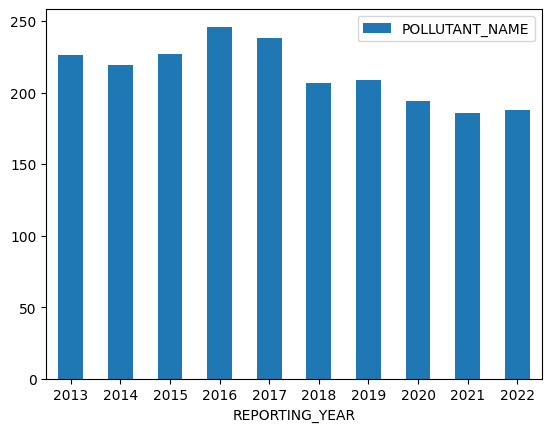

In [ ]:
grouped = this_place.groupby(by="REPORTING_YEAR")[["POLLUTANT_NAME"]].nunique().reset_index()
grouped.plot.bar(x='REPORTING_YEAR', y='POLLUTANT_NAME', rot=0)

In [ ]:
# Max number of health systems affected each year - the number of chemicals reported released may be declining, but are they getting less toxic?
j = pandas.merge(this_place, tri_chemicals, left_on="POLLUTANT_NAME", right_on="Chemical", how="left")
j["count"] = j[systems].apply(lambda s: (s == "X").sum(), axis=1)
j.groupby(by="REPORTING_YEAR")[["count"]].max()

,count
REPORTING_YEAR,
2013,8
2014,8
2015,8
2016,8
2017,8
2018,8
2019,8
2020,8
2021,8
